Collegarsi ad database bikestore ed estrarre le seguenti informazioni



1.   Il numero di prodotti per ogni categoria, in formato tabellare e in formato grafico a barre verticali.
2.   Il numero di ordini per ogni store, sia in formato tabellare e in formato grafico a barre orizzontali
3. Il numero di prodotti per ogni brand, sia in formato tabellare e in formato a torta.

Salvare tutte le informazioni su un file PDF.



In [ ]:
!pip install pymssql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 7.4 MB/s 


In [ ]:
import pandas as pd
import pymssql
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
conn = pymssql.connect(server='213.140.22.237\SQLEXPRESS', user='giodice.andrea', password='', database='giodice.andrea')

In [ ]:
query = "SELECT * FROM Stadiums WHERE IOC = ""
df1 = pd.read_sql(query,conn)
df1

DatabaseError: ignored

1. Il numero di prodotti per ogni categoria, in formato tabellare e in formato grafico a barre verticali.

In [ ]:
query = 'SELECT category_name, count(*) as numero_prodotti FROM production.products inner join production.categories ON categories.category_id = production.products.category_id GROUP BY category_id ORDER BY numero_prodotti desc'
df1 = pd.read_sql(query,conn)
df1

,category_name,numero_prodotti
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30
5,Electric Bikes,24
6,Cyclocross Bicycles,10


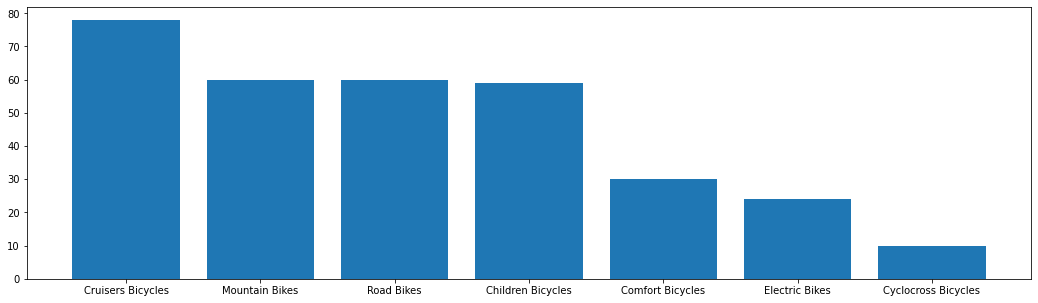

In [ ]:
ax1 = plt.figure(figsize=(18,5))
ax1 = plt.bar(df1.category_name,df1.numero_prodotti)
plt.show()

2. Il numero di ordini per ogni store, sia in formato tabellare e in formato grafico a barre orizzontali

In [ ]:
query = 'SELECT store_name, COUNT(*) as numero_ordini FROM sales.orders inner join sales.stores ON sales.orders.store_id = sales.stores.store_id GROUP BY sales.orders.store_id, sales.stores.store_name ORDER BY numero_ordini desc'
df2 = pd.read_sql(query,conn)
df2

,store_name,numero_ordini
0,Baldwin Bikes,1093
1,Santa Cruz Bikes,348
2,Rowlett Bikes,174


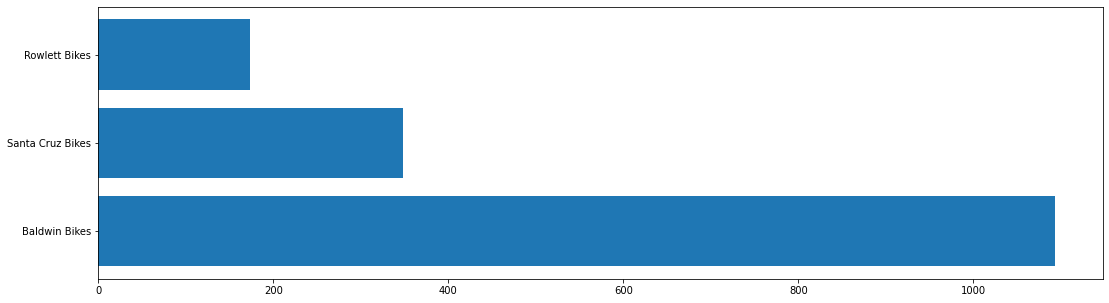

In [ ]:
ax2 = plt.figure(figsize=(18,5))
ax2 = plt.barh(df2.store_name,df2.numero_ordini)
plt.show()

3. Il numero di prodotti per ogni brand, sia in formato tabellare e in formato a torta.

In [ ]:
query = 'SELECT production.brands.brand_name,COUNT(*) as numero_prodotti FROM production.products inner join production.brands ON production.brands.brand_id = production.products.brand_id GROUP BY production.products.brand_id, production.brands.brand_name ORDER BY numero_prodotti desc'
df3 = pd.read_sql(query,conn)
df3

,brand_name,numero_prodotti
0,Trek,135
1,Electra,118
2,Surly,25
3,Sun Bicycles,23
4,Haro,10
5,Heller,3
6,Pure Cycles,3
7,Strider,3
8,Ritchey,1


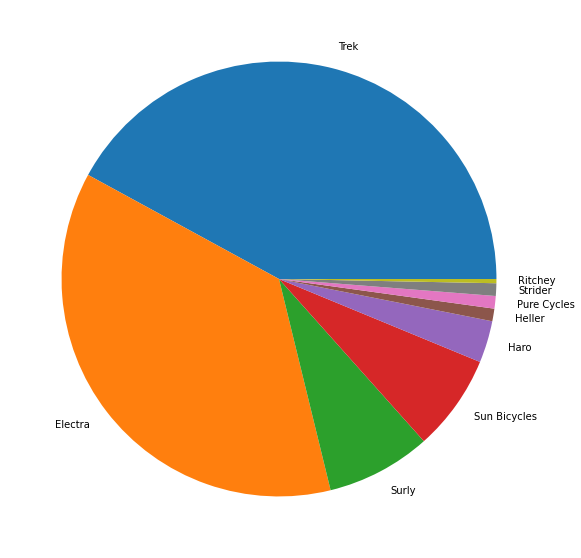

In [ ]:
ax3 = plt.figure(figsize=(10,10))
ax3 = plt.pie(df3.numero_prodotti,labels=df3.brand_name)
plt.show()

In [ ]:
!pip install pdfkit 
import pdfkit as pdf
from matplotlib.backends

Scrivere un programma per avere tutte le informazioni riguardanti un prodotto.
L'utente inserisce l'id del prodotto e il programma restituisce tutte le informazioni.

In [ ]:
id = input('Inserire l\'id del prodotto')
query = 'SELECT * FROM production.products WHERE product_id = ' + id
print(query)
df3 = pd.read_sql(query,conn)
df3

Inserire l'id del prodotto10 or 1=1
SELECT * FROM production.products WHERE product_id = 10 or 1=1


,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [ ]:
nomeProd = input() 
query = "select * from production.products where product_name like '" + nomeProd + "%'" 
df3 = pd.read_sql(query,conn)
df3

123 = 92


,product_id,product_name,brand_id,category_id,model_year,list_price
